# How to plot unstructured mesh file on Jupyter Notebook

Tetsuo Koyama @PyConJP2020

# Introduction

## What we want to do ?

When we want to plot mesh it cost a lot to code.

# Introduction

## Summary

When we want to plot mesh it cost a lot to code.

# Using library

# Using library

# Using library

# Using library

# Examples

# Examples

# Examples

# Examples

# development of meshioplt

# development of meshioplt

# development of meshioplt

# Summary

# Questions and answers

In [1]:
%matplotlib inline
import meshio
import matplotlib
import getfem as gf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = gf.Mesh("cartesian", np.arange(3), np.arange(3))

In [3]:
m.export_to_vtk("m.vtk", "ascii")

In [4]:
!cat m.vtk

# vtk DataFile Version 2.0
Exported by getfem++
ASCII
DATASET UNSTRUCTURED_GRID
POINTS 9 float
 0 0 0
 1 0 0
 0 1 0
 1 1 0
 2 0 0
 2 1 0
 0 2 0
 1 2 0
 2 2 0

CELLS 4 20
 4 0 1 3 2
 4 1 4 5 3
 4 2 3 7 6
 4 3 5 8 7

CELL_TYPES 4
 9
 9
 9
 9


In [5]:
mesh = meshio.read("m.vtk")

In [6]:
points = mesh.points
cells = mesh.cells

In [7]:
cells

[CellBlock(type='quad', data=array([[0, 1, 3, 2],
        [1, 4, 5, 3],
        [2, 3, 7, 6],
        [3, 5, 8, 7]]))]

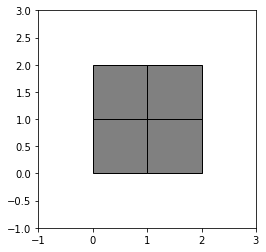

In [8]:
figure = plt.figure()
axe = figure.add_subplot(111)
for cell in cells:
    for index in cell.data:
        polygon = plt.Polygon(
            (
                (points[index[0], 0], points[index[0], 1]),
                (points[index[1], 0], points[index[1], 1]),
                (points[index[2], 0], points[index[2], 1]),
                (points[index[3], 0], points[index[3], 1]),
            ),
            edgecolor="black",
            facecolor="gray",
        )
        axe.add_patch(polygon)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.show()

In [9]:
axe?

# What we can do in meshioplt

We can read mesh file and write to AxesSubplot. We can use AxesSubplot as matplotlib's AxesSubplot

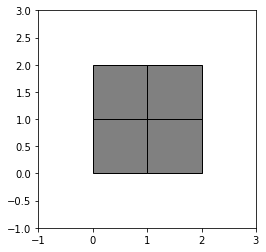

In [10]:
from meshioplt import mesh_patches

figure = plt.figure()
axe = figure.add_subplot(111)
patches = mesh_patches("m.vtk")
for patch in patches:
    axe.add_patch(patch)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.show()